# Simulating a match

In [1]:
import numpy as np
import numpy.random as rnd
import time
import pylab as plt

In [2]:
#setting some football parameters
match_minutes = 90
#average goals per game
goals_per_match = 2.79
#probability of a goal per minutes
prob_per_minute = np.array(goals_per_match/match_minutes)
print('The probability of a goal per minute is %5.5f. \n'% prob_per_minute)

The probability of a goal per minute is 0.03100. 



## Simulating a single game

In [4]:
for sim in range(10):
    goals = 0
    print(f'Simulation {sim+1}\n')
    for minute in range(match_minutes):
        #generate a random number between 0 and 1
        r = rnd.rand(1,1)

        #prints an X when there is a goal and a zero otherwise
        if (r < prob_per_minute):
            #goal if the random number is less than the goal prob
            print('X', end = ' ')
            goals = goals+1
            time.sleep(1) #longer pause
        else:
            print('o', end=' ')
            time.sleep(0.1) # short pause
    print('\n')
    print('Final whistle. \n \nThere were '+ str(goals)+' goals.\n')

Simulation 1

o o o o X o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o 

Final whistle. 
 
There were 4 goals.
Simulation 2

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o 

Final whistle. 
 
There were 1 goals.
Simulation 3

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X X o o o o o o o o o 

Final whistle. 
 
There were 3 goals.
Simulation 4

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o 

Final whistle. 
 
There were 1 goals.
Simulation 5

o o o o o o o o o o o o o o o o o o o o o o o o o 

## Simulating goals over a season

Season 1


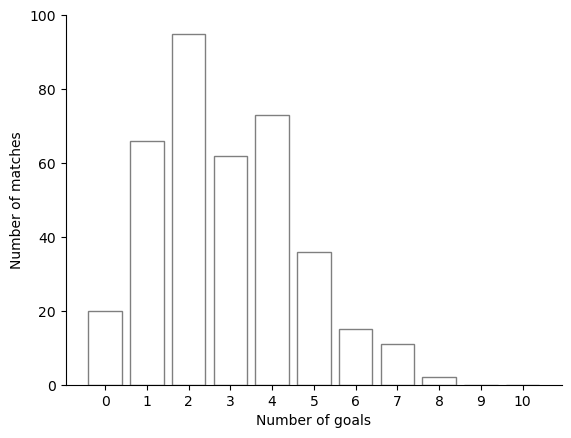

Season 2


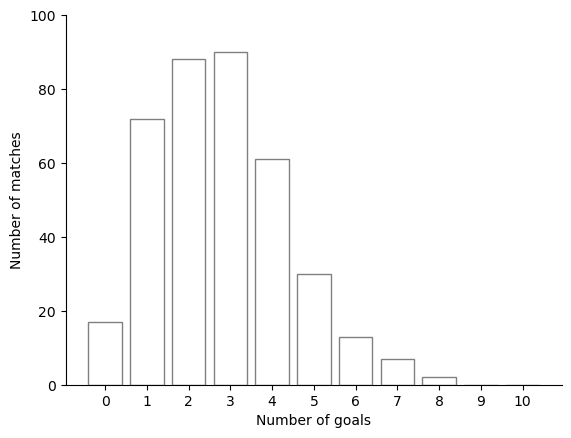

Season 3


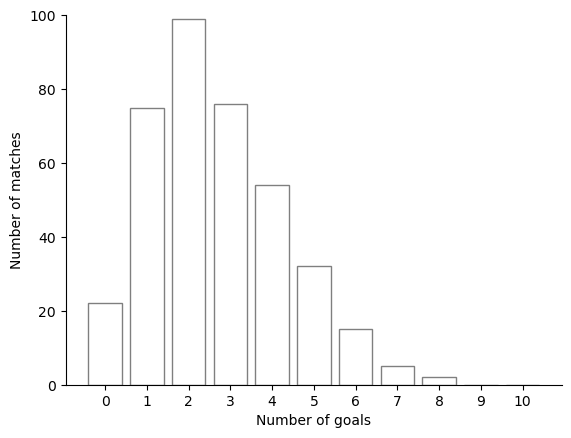

Season 4


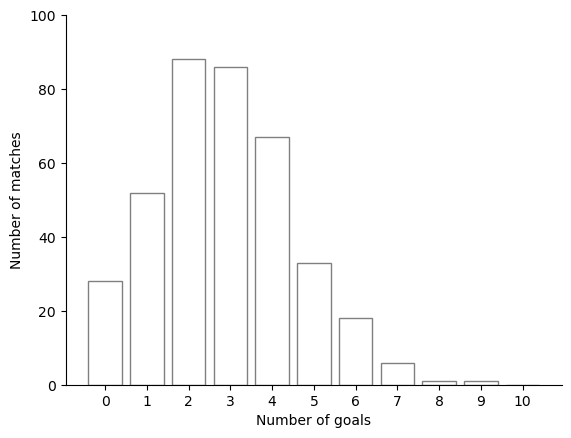

Season 5


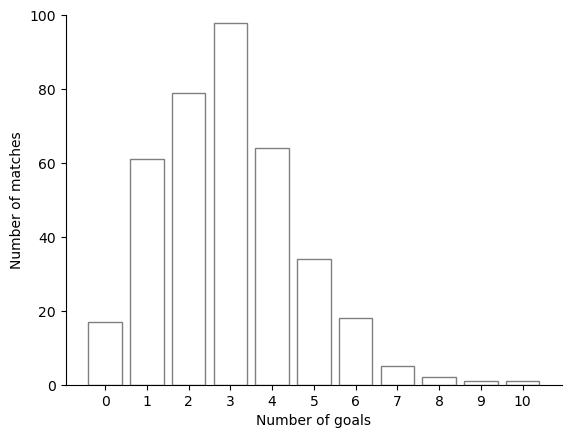

In [5]:
def simulateMatch(n, p):
    # n - number of time units
    # p - probability per time unit of a goal
    # display_match == True then display simulation output for match

    goals=0

    for minute in range(n):
        r = rnd.rand(1,1)
        if (r < p):
            goals = goals+1
    
    return goals
for i in range(5):
    print(f'Season {i+1}')
    num_matches = 380
    #loop over all matches and print the number of goals
    goals = np.zeros(num_matches)
    for i in range(num_matches):
        goals[i] = simulateMatch(match_minutes, prob_per_minute)


    # creating a histogram
    fig, ax = plt.subplots(num=1)

    histogram_range = np.arange(-0.5, 10.51, 1)
    histogram_goals = np.histogram(goals, histogram_range)

    ax.bar(histogram_goals[1][:-1] + 0.5, histogram_goals[0], color='white', edgecolor='black', linestyle='-', alpha=0.5)
    ax.set_ylim(0, 100)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(np.arange(0, 11, step=1))
    ax.set_yticks(np.arange(0, 101, step=20))
    ax.set_xlabel('Number of goals')
    ax.set_ylabel('Number of matches')
    plt.show()

## Simulating results using a Poisson regression

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
from scipy.stats import poisson, skellam

In [2]:
epl = pd.read_csv(r"C:\Users\elvin\Documents\Soccermatics\footballdata.csv")
epl = epl[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl = epl.rename(columns={'FTHG':'HomeGoals','FTAG':'AwayGoals'})
epl.head()

epl = epl[:-10]

In [6]:
goal_model_data = pd.concat([epl[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
    columns={'HomeTeam':'team','AwayTeam':'opponent','HomeGoals':'goals'}),
    epl[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
    columns={'AwayTeam':'team','HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family = sm.families.Poisson()).fit()

poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1043.1
Date:                Mon, 15 Sep 2025   Deviance:                       776.72
Time:                        15:19:31   Pearson chi2:                     681.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2498
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2470      0.203      1.214      0.225      -0.152       0.646
team[T.Aston Villa]           -0.1298      0.195     -0.666      0.506      -0.512       0.252
team[T.Brentford]             -0.1589      0.198     -0.802      0.423      -0.547       0.230
team[T.Brighton]              -0.3735      0.209     -1.788      0.074      -0.783       0.036
team[T.Burnley]               -0.5263      0.220     -2.395      0.017      -0.957      -0.096
team[T.Chelsea]                0.2714      0.177      1.529      0.126      -0.077       0.619
team[T.Crystal Palace]        -0.1370      0.196     -0.699      0.484      -0.521       0.247
team[T.Everton]               -0.2847      0.204     -1.394      0.163      -0.685       0.116
team[T.Leeds]                 -0.3127      0.207     -1.507      0.132      -0.719       0.094
team[T.Leicester]              0.0481      0.188      0.256      0.798      -0.320       0.416
team[T.Liverpool]              0.4522      0.170      2.657      0.008       0.119       0.786
team[T.Man City]               0.5115      0.168      3.036      0.002       0.181       0.842
team[T.Man United]             0.0156      0.189      0.083      0.934      -0.354       0.385
team[T.Newcastle]             -0.2841      0.204     -1.389      0.165      -0.685       0.117
team[T.Norwich]               -0.8697      0.248     -3.507      0.000      -1.356      -0.384
team[T.Southampton]           -0.2770      0.205     -1.354      0.176      -0.678       0.124
team[T.Tottenham]              0.1294      0.183      0.706      0.480      -0.230       0.489
team[T.Watford]               -0.5181      0.220     -2.357      0.018      -0.949      -0.087
team[T.West Ham]               0.0398      0.187      0.213      0.831      -0.327       0.406
team[T.Wolves]                -0.4429      0.212     -2.088      0.037      -0.859      -0.027
opponent[T.Aston Villa]        0.1071      0.203      0.529      0.597      -0.290       0.504
opponent[T.Brentford]          0.1297      0.200      0.649      0.516      -0.262       0.521
opponent[T.Brighton]          -0.0994      0.211     -0.470      0.638      -0.514       0.315
opponent[T.Burnley]            0.0579      0.202      0.286      0.775      -0.339       0.455
opponent[T.Chelsea]           -0.3702      0.230     -1.613      0.107      -0.820       0.080
opponent[T.Crystal Palace]    -0.0219      0.208     -0.105      0.916      -0.429       0.385
opponent[T.Everton]            0.2573      0.194      1.325      0.185      -0.123       0.638
opponent[T.Leeds]              0.4973      0.185      2.688      0.007       0.135       0.860
opponent[T.Leicester]          0.2134      0.197      1.085      0.278      -0.172       0.599
opponent[T.Liverpool]         -0.6001      

### Simulating a game between Newcastle and Brentford


In [7]:
home_team = 'Newcastle'
away_team = 'Brentford'

#Predict for Newcastle v Brentford
home_score_rate = poisson_model.predict(pd.DataFrame(data={'team':home_team, 'opponent': away_team,
                                                           'home':1}, index=[1]))

away_score_rate = poisson_model.predict(pd.DataFrame(data={'team':away_team, 'opponent': home_team,
                                                           'home':0}, index=[1]))

print(home_team + ' against '+ away_team + ' expect to score: '+ str(home_score_rate))
print(away_team + ' against '+ home_team + ' expect to score: '+ str(away_score_rate))

#getting a result
home_goals = np.random.poisson(home_score_rate)
away_goals = np.random.poisson(away_score_rate)
print(home_team+': '+ str(home_goals[0]))
print(away_team+': '+ str(away_goals[0]))

Newcastle against Brentford expect to score: 1    1.274722
dtype: float64
Brentford against Newcastle expect to score: 1    1.394547
dtype: float64
Newcastle: 1
Brentford: 1


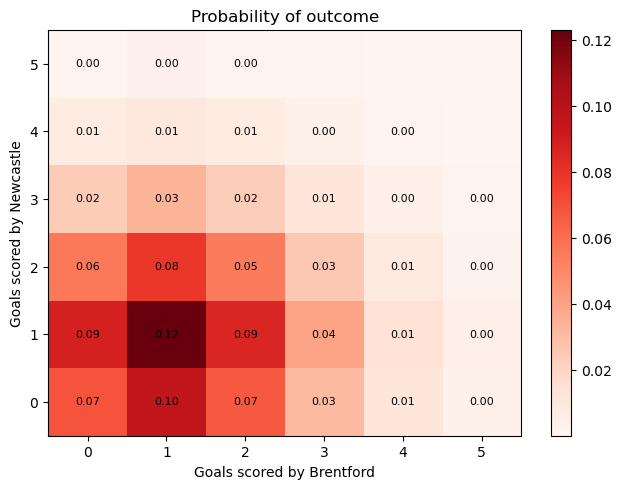

In [14]:
# A 2D histogram for the most likely scores between the 2 teams
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team':home_team, 'opponent': away_team,
                                                           'home':1}, index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team':away_team, 'opponent': home_team,
                                                           'home':0}, index=[1])).values[0]
    
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg,away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#fill in the matrix
max_goals = 5
score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
pos = ax.imshow(score_matrix, extent=[-0.5, max_goals+0.5,-0.5,max_goals+0.5], origin='lower', aspect='auto', cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)

for i in range(score_matrix.shape[0]):        
    for j in range(score_matrix.shape[1]):    
        prob = score_matrix[i, j]
        if prob > 0.001:
            ax.text(j, i, f"{prob:.2f}", ha="center", va="center", color="black", fontsize=8)




plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))